# Gray Scaleimport cv2 as cv

##                       Import library 

In [1]:
import cv2 as cv
import numpy as np 
from matplotlib.image import imread
import matplotlib.pyplot as plt

### making RGB Image by array

In [2]:
array_image = np.array([[(255, 0, 0 ),( 0 ,255, 0 ),( 0 , 0 ,255)]
              ,[(200,70,200),(255,255,255),(250,50,205)]
              ,[( 0 , 0 , 0 ),(200,150,50),(50,50 ,50)]])


#### Show image 

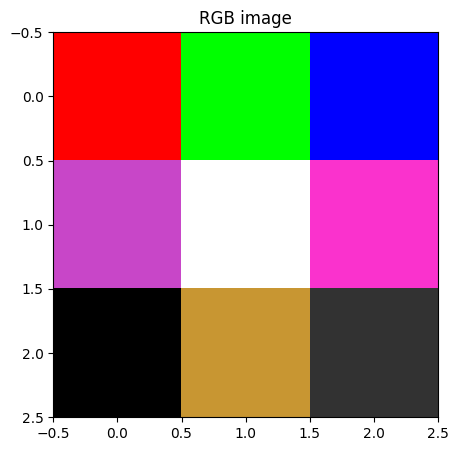

In [3]:
plt.subplots(figsize=(10 , 5)) 
plt.title("RGB image")
plt.imshow(array_image)
plt.show()

### Function to convert from RGB to GRAY 

In [4]:
def BGR2GRAY (image) :
    RED_CANELS = image[...,0]
    GREEN_CANELS = image[...,1]
    BLUE_CANELS = image[...,2]
    
    gray_image = RED_CANELS*0.299 + GREEN_CANELS*0.587 + BLUE_CANELS * 0.114 
#     print (f"{RED_CANELS} \n\n {GREEN_CANELS} \n\n {BLUE_CANELS} \n\n\n {gray_image}" )
    return gray_image 

### show Gray image 

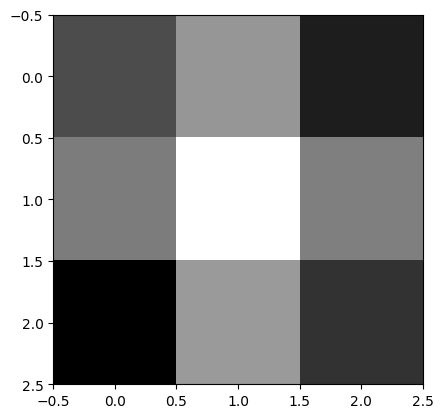

In [5]:
gray_image = BGR2GRAY(array_image)
plt.imshow(gray_image , cmap="gray")

##  convert from RGB to GRAY using open cv method

In [6]:
array_image= array_image.astype(np.uint8)

gray_image = cv.cvtColor(array_image, cv.COLOR_RGB2GRAY)

### show Gray image 

[[ 76 150  29]
 [124 255 127]
 [  0 154  50]]


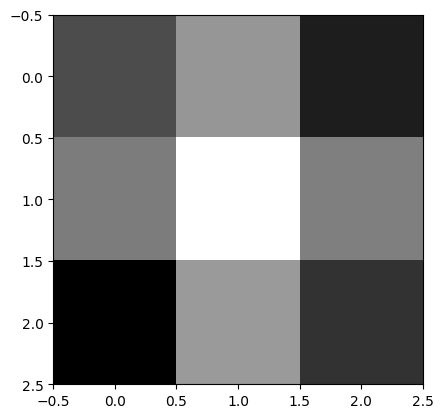

In [7]:
plt.imshow(gray_image , cmap = "gray")
print(gray_image)

### RGB and GRAY ballon Image

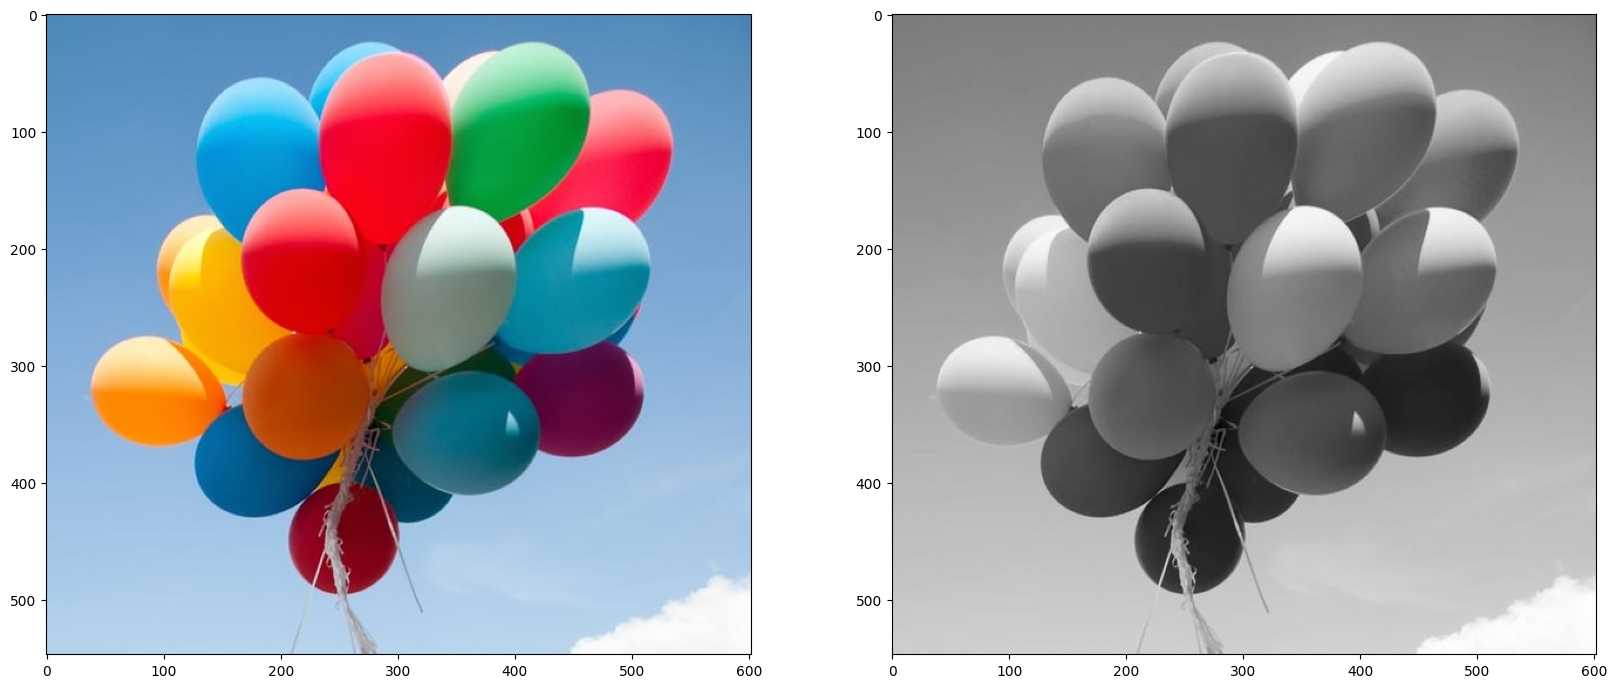

In [8]:
image = imread("photo/balloons.jpg")
gray_image = BGR2GRAY(image) 
f , ( im1 , im2 ) = plt.subplots(1 , 2 , figsize = (20 , 10 ))
im1.imshow(image)
im2.imshow(gray_image , cmap = "gray")


# Histograms

## Normal image 

Text(0, 0.5, 'number of pixels')

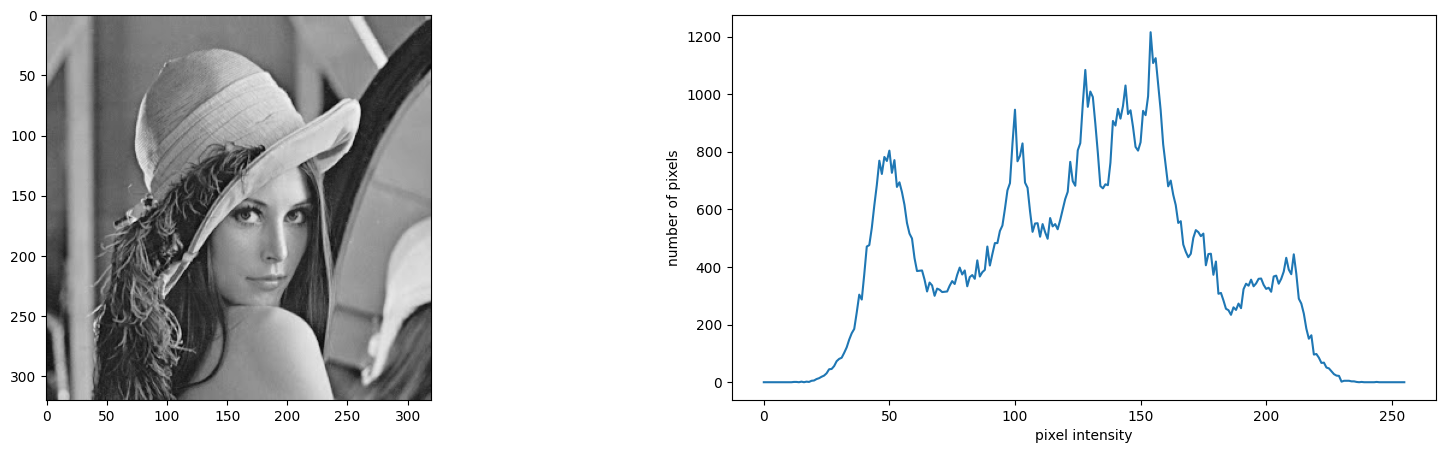

In [9]:
img = cv.imread("photo\lena.jpg",cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0, 256])

f , ( im1 , im2 ) = plt.subplots(1 , 2 , figsize = (20 , 5 ))

im1.imshow(img,cmap='gray')
im2.plot(hist)
plt.xlabel("pixel intensity")
plt.ylabel("number of pixels")


## Equalization Histograms 

Text(0, 0.5, 'number of pixels')

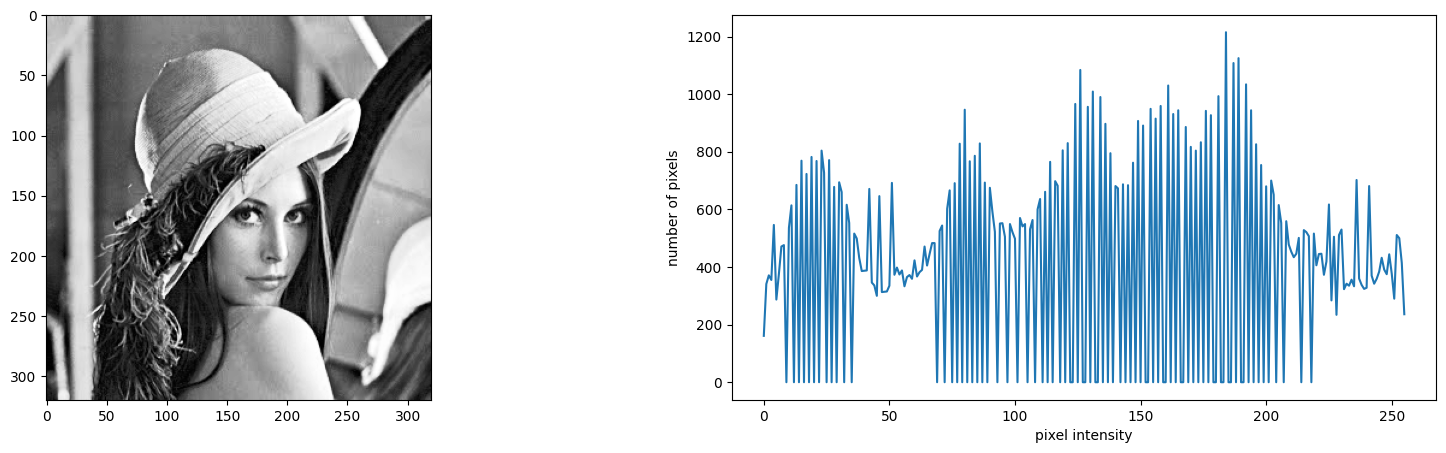

In [10]:
equImg = cv.equalizeHist(img)
equHist = cv.calcHist([equImg], [0], None, [256], [0, 256])

f , ( im1 ,im2 ) = plt.subplots(1 , 2 , figsize = (20 ,5 ))

im1.imshow(equImg,cmap='gray')
im2.plot(equHist)
plt.xlabel("pixel intensity")
plt.ylabel("number of pixels")

## Clahe Histograms

Text(0, 0.5, 'number of pixels')

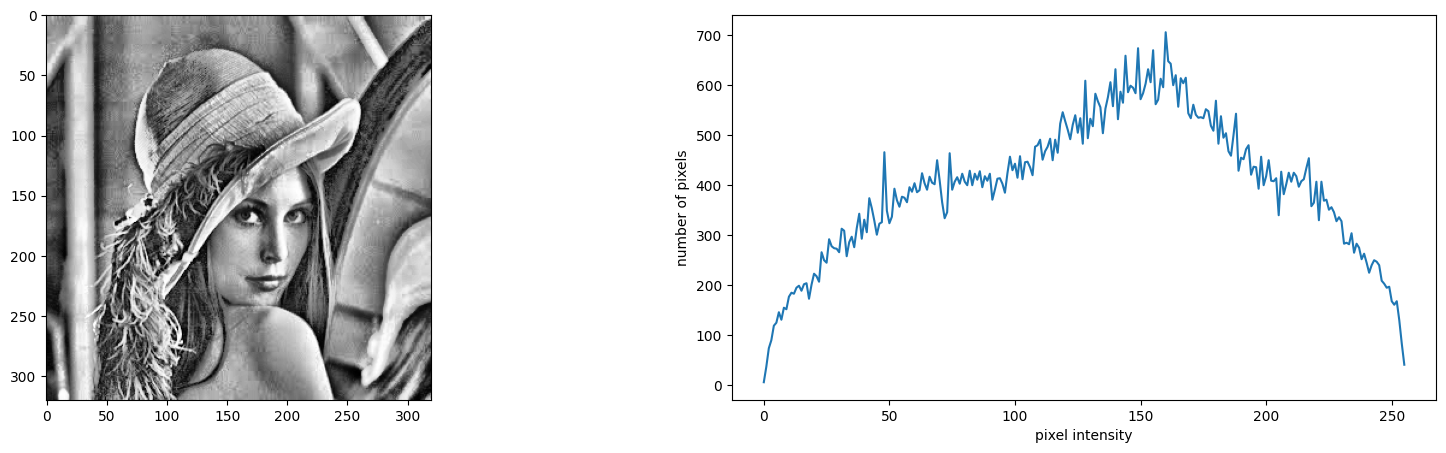

In [11]:
claheObj = cv.createCLAHE(clipLimit=5,tileGridSize=(8,8))
claheImg = claheObj.apply(img)
claheHist = cv.calcHist([claheImg], [0], None, [256], [0, 256])

f , ( im1 , im2 ) = plt.subplots(1 , 2 , figsize = (20 , 5 ))

im1.imshow(claheImg,cmap='gray')
im2.plot(claheHist)
plt.xlabel("pixel intensity")
plt.ylabel("number of pixels")

# comparison

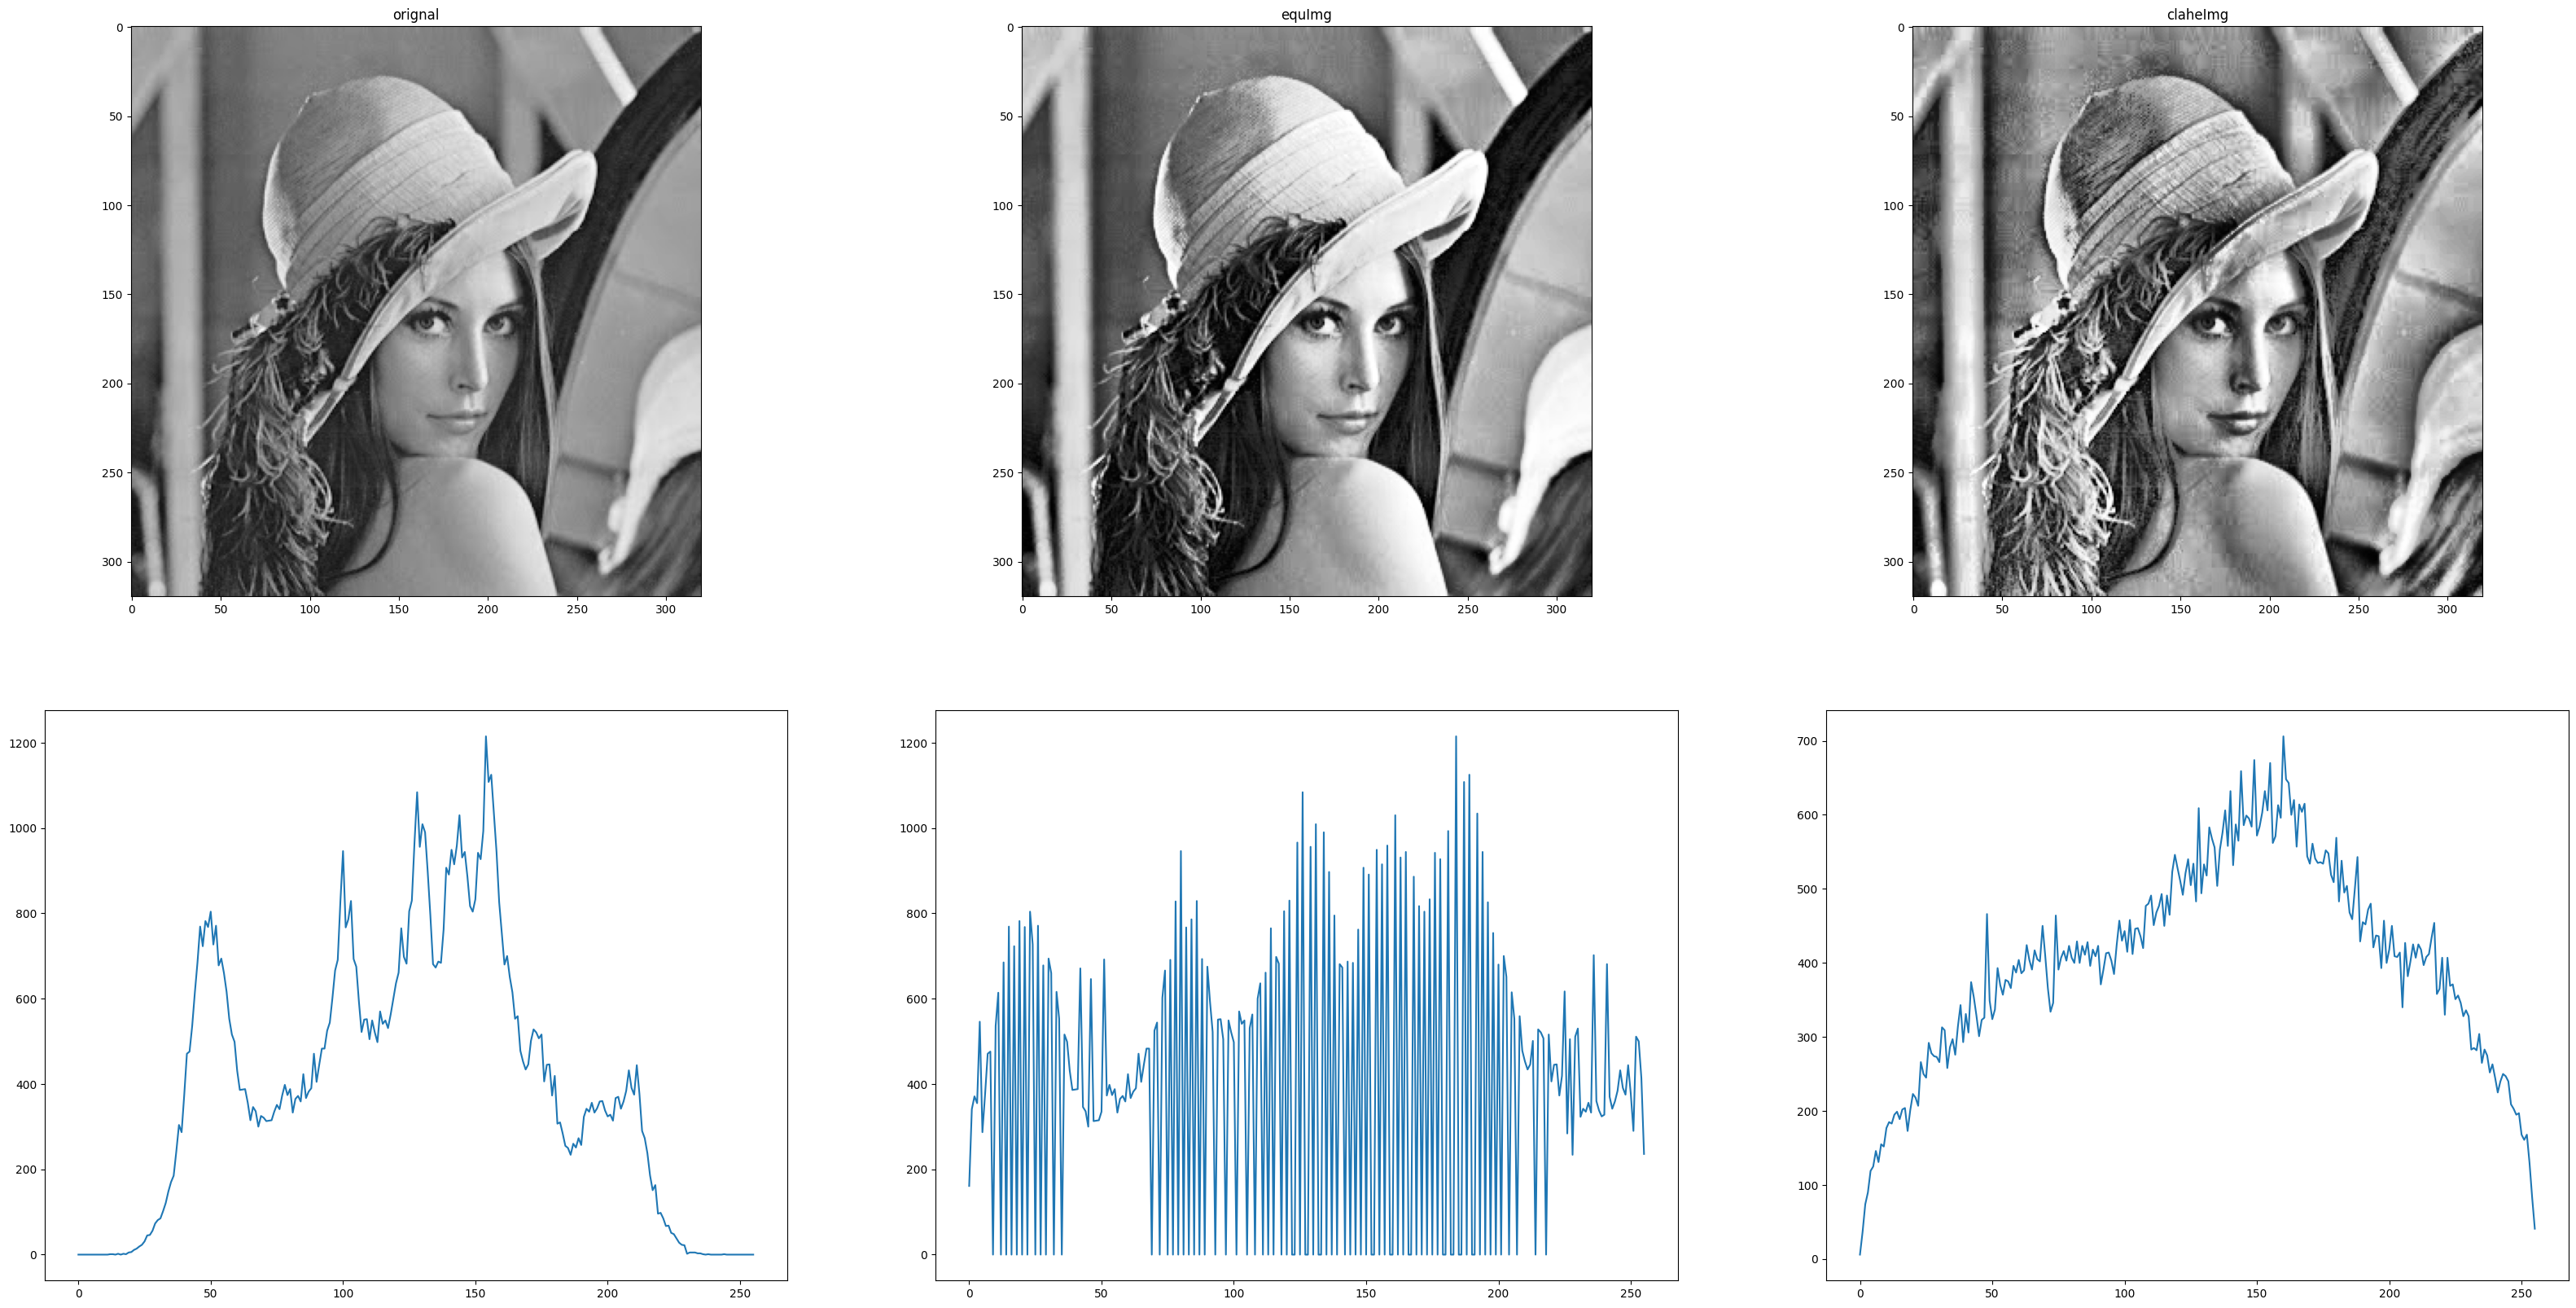

In [12]:
f , (( im1 , im2 , im3) , ( i1 , i2 , i3)) = plt.subplots(2 , 3 , figsize = (40 , 20))

im1.imshow(img,cmap='gray')
im1.set_title("orignal")

im2.imshow(equImg,cmap='gray')
im2.set_title("equImg")

im3.imshow(claheImg,cmap='gray')
im3.set_title("claheImg")

i1.plot(hist)
i2.plot(equHist)
i3.plot(claheHist)
